In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
coins_gray = cv.imread("./coins.png", cv.IMREADCOLOR)
 
_, coins_bin = cv.threshold(coins_gray, 120, 200, cv.THRESH_BINARY)

kernel_ellipse = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7, 7))
coins_dilated = cv.erode(coins_bin, kernel_ellipse, iterations=5)

_, bologna_labels = cv.connectedComponents(coins_dilated)

plt.figure(figsize=[15,5])
plt.subplot(131)
plt.imshow(coins_bin, cmap='gray')
plt.title("Orginal")
plt.subplot(132)
plt.imshow(coins_dilated, cmap='gray')
plt.title("Grayscale")
plt.subplot(133)
plt.imshow(bologna_labels, cmap='gray')
plt.title("Grayscale")

AttributeError: module 'cv2.cv2' has no attribute 'IMREADCOLOR'

In [3]:
bologna_n = bologna_labels.max()

plt.figure(figsize=[12,7])

for i in range(bologna_n+1):
    plt.subplot(331+i)
    plt.imshow(bologna_labels==i, cmap='gray')
    plt.title(f"Label: {i}")

NameError: name 'bologna_labels' is not defined

[<KeyPoint 000001F55E05AF00>, <KeyPoint 000001F55E270210>, <KeyPoint 000001F55E270270>, <KeyPoint 000001F55E270F30>, <KeyPoint 000001F55CAB4420>]


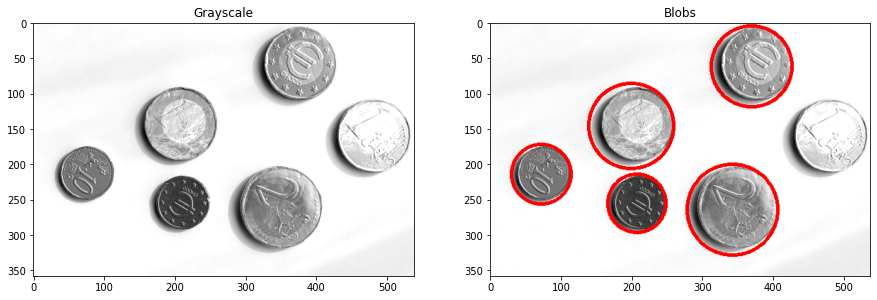

In [4]:
params = cv.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea=3000
params.maxArea=15000
params.minThreshold = 0
params.maxThreshold = 255
params.filterByConvexity = True
params.minConvexity >= 0



blobs_gray = cv.imread("./coins.png", cv.IMREAD_GRAYSCALE)
#zwiekszenie kontrastu
matrix = np.ones(blobs_gray.shape, dtype = 'float64')
blobs_gray  = np.uint8(np.clip(cv.multiply(np.float64(blobs_gray), matrix, scale = 1.3) , 0, 255))
 
blob_detector = cv.SimpleBlobDetector_create(params)

keypoints = blob_detector.detect(blobs_gray)

blobs_color = cv.cvtColor(blobs_gray, cv.COLOR_GRAY2BGR)

print(keypoints)
for kp in keypoints:
    x, y = kp.pt
    x = int(round(x))
    y = int(round(y))

    radius = int(round(kp.size/2))

    cv.circle(blobs_color, (x,y), radius, (0,0,255), 3)

plt.figure(figsize=[15,5])
plt.subplot(121)
plt.imshow(blobs_gray, cmap='gray')
plt.title("Grayscale")
plt.subplot(122)
plt.imshow(blobs_color[:,:,::-1])
plt.title("Blobs");